<h7>NAME-KRISH KHADRIA</br>
ENROLLMENT NUMBER- 22112057</br>
BRANCH- DSAI</br>
AI COURSE PROJECT </br></h7>

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

### DEFINING LEARNER

In [2]:
def weak_learner(P, Qt):
    # Updated weak learner with 'logistic' activation for output layer
    classifier = MLPClassifier(
        hidden_layer_sizes=(25, 25, 25),
        activation='tanh',
        solver='sgd',
        learning_rate='constant',
        learning_rate_init=0.01,
        max_iter=750
    )
    classifier.fit(np.arange(len(P)).reshape(-1, 1), np.sign(Qt))
    return classifier.predict(np.arange(len(P)).reshape(-1, 1))




### APPLYING THE ALGORITHM

In [3]:
def boosting_algorithm(WL, T, epsilon, Q0, P):
    # Initialize weights and distribution
    theta = (epsilon / (epsilon + 4 * np.log(2))) ** np.arange(1, T + 1)
    Qt = np.copy(Q0)

    for t in range(T):
        # Weak learner
        ct = WL(P, Qt)

        # Update distribution weights
        Qt *= np.exp(theta[t] * ct)

        # Ensure non-negativity
        Qt = np.maximum(0, Qt)

        # Normalize to maintain a probability distribution
        Qt /= np.sum(Qt)

    return Qt


def generate_synthetic_dataset(original_dataset, final_distribution):
    # Use final distribution to generate synthetic dataset
    # generates a synthetic dataset by randomly sampling from the 
    # original_dataset with replacement, where the probability of 
    # each element being chosen is determined by the final_distribution.
    synthetic_dataset = np.random.choice(
        original_dataset, size=len(original_dataset), p=final_distribution)

    return synthetic_dataset

### IMPLEMENTATION

In [4]:
original_dataset = np.random.normal(loc=0, scale=1, size=1000)
# Replace this line of code with the path of the data, if dataset is already present.
P = np.random.rand(len(original_dataset))
# generates a set of random probabilities P with the same length as the original_dataset.
#  These probabilities are used to weight the samples in the density estimation process.

# Define parameters
T = 10
epsilon = 0.1
Q0 = np.random.normal(loc=0, scale=1, size=len(
    original_dataset))  
# Run boosting algorithm
final_distribution = boosting_algorithm(weak_learner, T, epsilon, Q0, P)
# Generate synthetic dataset
synthetic_dataset = generate_synthetic_dataset(
    original_dataset, final_distribution)

### FINAL VISUALIZATION OF THE ORIGINAL AND E-PRIVATE LDP DATA

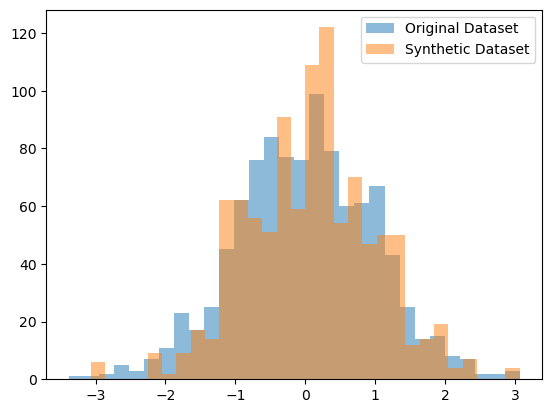

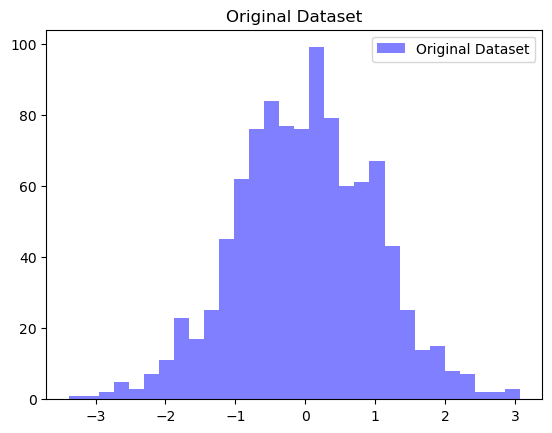

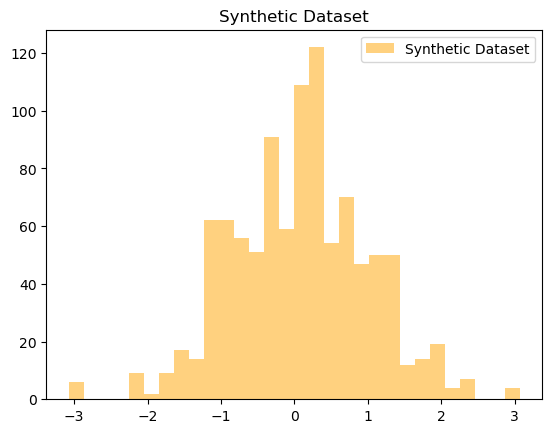

In [5]:
# Plot original and synthetic distributions
plt.hist(original_dataset, bins=30, alpha=0.5, label='Original Dataset')
plt.hist(synthetic_dataset, bins=30, alpha=0.5, label='Synthetic Dataset')
plt.legend()
plt.show()
# Plot original dataset
plt.hist(original_dataset, bins=30, alpha=0.5,
         color='blue', label='Original Dataset')
plt.legend()
plt.title('Original Dataset')
plt.show()
# Plot synthetic dataset
plt.hist(synthetic_dataset, bins=30, alpha=0.5,
         color='orange', label='Synthetic Dataset')
plt.legend()
plt.title('Synthetic Dataset')
plt.show()

### METRICES ANALYSIS ON GIVEN EXPERIMENT DATA

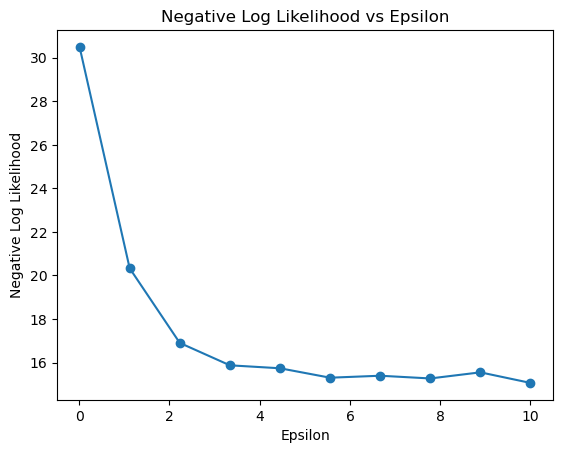

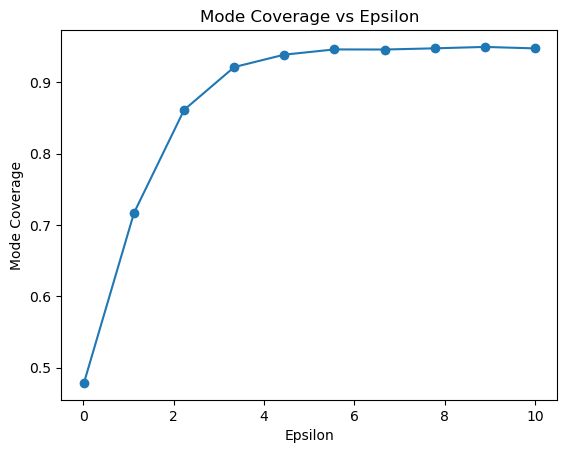

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


import scipy.special


def mode_coverage(P, Q, coverage_threshold=0.95):
    # Sort the values of Q in ascending order and get the sorted indices
    sorted_Q_indices = np.argsort(Q)

    # Rearrange the elements of P according to the sorted indices and compute the cumulative sum
    cumulative_density = np.cumsum(P[sorted_Q_indices])

    # Calculate the index where the cumulative density first exceeds or equals the coverage threshold
    t_index = np.argmax(cumulative_density >= coverage_threshold * np.sum(P))

    # Retrieve the corresponding threshold value of Q
    t = Q[sorted_Q_indices[t_index]]

    # Return mode coverage values
    return scipy.special.expit(epsilon) * np.mean(Q < t)



def negative_log_likelihood(P, Q):
    # Add a small constant to avoid log(0)
    return -np.mean(np.log(Q + 1e-10)) / scipy.special.expit(epsilon)
    # The negative log likelihood is a measure of how well the learned distribution fits the target distribution



def weak_learner(P, Qt):
    classifier = MLPClassifier(
        hidden_layer_sizes=(25, 25, 25),
        activation='tanh',
        solver='sgd',
        learning_rate='constant',
        learning_rate_init=0.01,
        max_iter=750
    )
    classifier.fit(np.arange(len(P)).reshape(-1, 1), np.sign(Qt))
    return classifier.predict(np.arange(len(P)).reshape(-1, 1))


def boosting_algorithm(WL, T, epsilon, Q0, P):
    theta = (epsilon / (epsilon + 4 * np.log(2))) ** np.arange(1, T + 1)
    Qt = np.copy(Q0)

    for t in range(T):
        ct = WL(P, Qt)
        Qt *= np.exp(theta[t] * ct)
        Qt = np.maximum(0, Qt)
        Qt /= np.sum(Qt)

    return Qt


def generate_synthetic_dataset(original_dataset, final_distribution):
    synthetic_dataset = np.random.choice(
        original_dataset, size=len(original_dataset), p=final_distribution)
    return synthetic_dataset


if __name__ == "__main__":

    # Parameters for the normal distributions
    means = [0.3, 0.5, 0.7]
    std_devs = [0.01, 0.1, 0.1]
    weights = [1/3,1,1]  # weights for the mixture

    # Number of samples you want to generate
    num_samples = 1000

    # Generate random samples
    samples = np.concatenate([
        np.random.normal(mean, std_dev, int(weight * num_samples))
        for mean, std_dev, weight in zip(means, std_devs, weights)
    ])

    # Shuffle the samples
    np.random.shuffle(samples)
    original_dataset = samples

    # original_dataset = np.random.normal(loc=0, scale=1, size=1000)
    P = np.random.rand(len(original_dataset))

    # Define parameters
    T = 10
    epsilons = np.linspace(0.01, 10.0, 10)  # Vary epsilon values
    mode_coverages = []
    negative_log_likelihoods = []

    for epsilon in epsilons:
        Q0 = np.random.normal(loc=0, scale=1, size=len(original_dataset))
        final_distribution = boosting_algorithm(
            weak_learner, T, epsilon, Q0, P)

        # Generate synthetic dataset
        synthetic_dataset = generate_synthetic_dataset(
            original_dataset, final_distribution)

        # Mode coverage and Negative Log Likelihood
        mode_coverage_value = mode_coverage(P, final_distribution)
        negative_log_likelihood_value = negative_log_likelihood(
            P, final_distribution)

        mode_coverages.append(mode_coverage_value)
        negative_log_likelihoods.append(negative_log_likelihood_value)

        # # Plot original and synthetic distributions
        # plt.hist(original_dataset, bins=30,
        #          alpha=0.5, label='Original Dataset')
        # plt.hist(synthetic_dataset, bins=30,
        #          alpha=0.5, label='Synthetic Dataset')
        # plt.legend()
        # plt.title(
        #     f'Synthetic Dataset (Epsilon={epsilon:.2f}, NLL={negative_log_likelihood_value:.2f}, Mode Coverage={mode_coverage_value:.2f})')
        # plt.show()

    # Plot NLL vs Epsilon
    plt.plot(epsilons, negative_log_likelihoods, marker='o')
    plt.xlabel('Epsilon')
    plt.ylabel('Negative Log Likelihood')
    plt.title('Negative Log Likelihood vs Epsilon')
    plt.show()

    # Plot Mode Coverage vs Epsilon
    plt.plot(epsilons, mode_coverages, marker='o')
    plt.xlabel('Epsilon')
    plt.ylabel('Mode Coverage')
    plt.title('Mode Coverage vs Epsilon')
    plt.show()

### IMPLEMENTATION AND METRICES ANALYSIS ON GAUSSIAN RING DATA

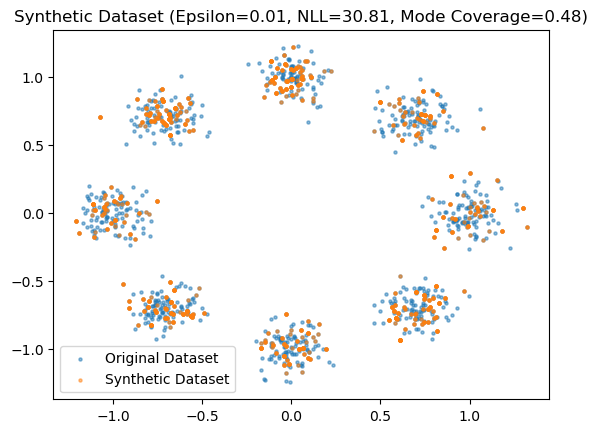

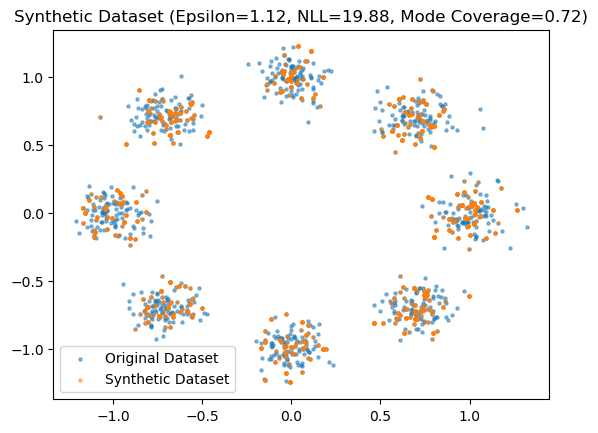

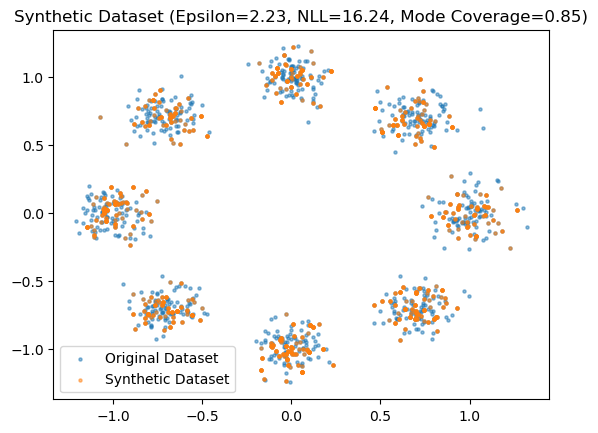

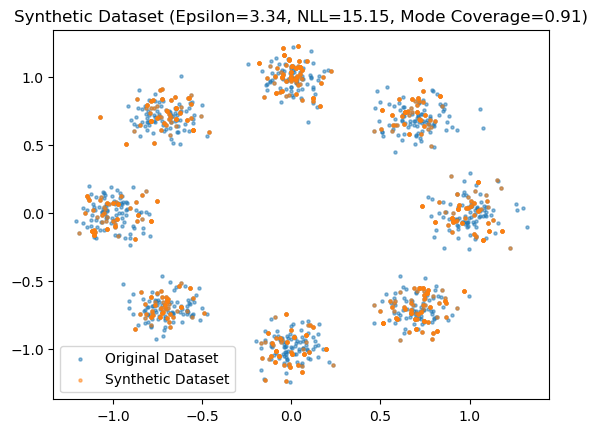

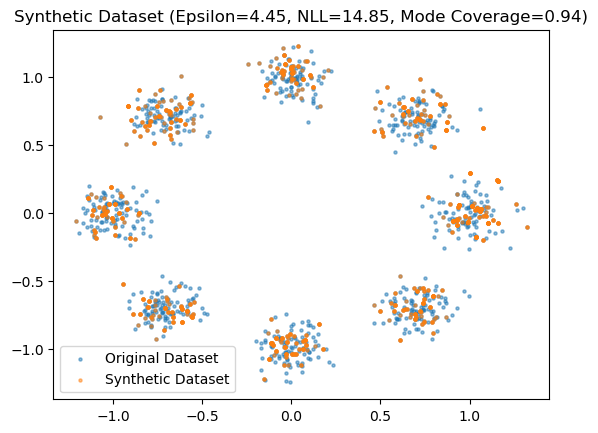

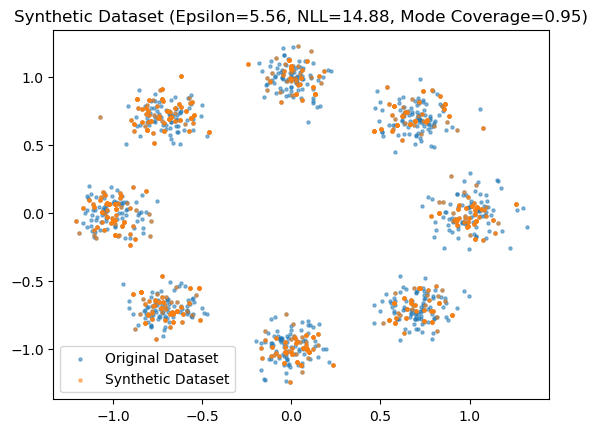

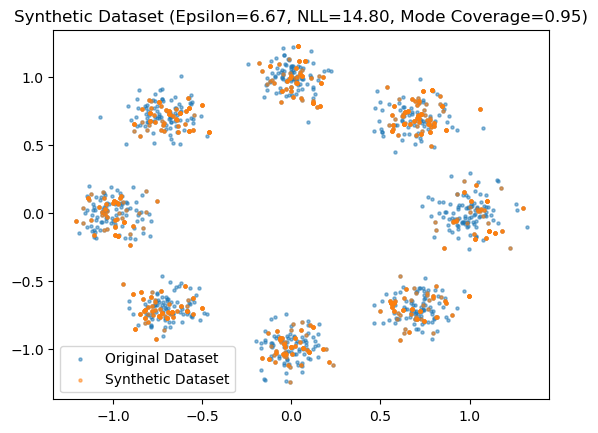

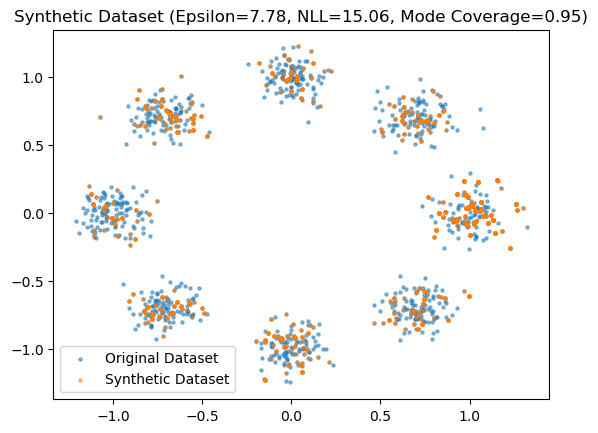

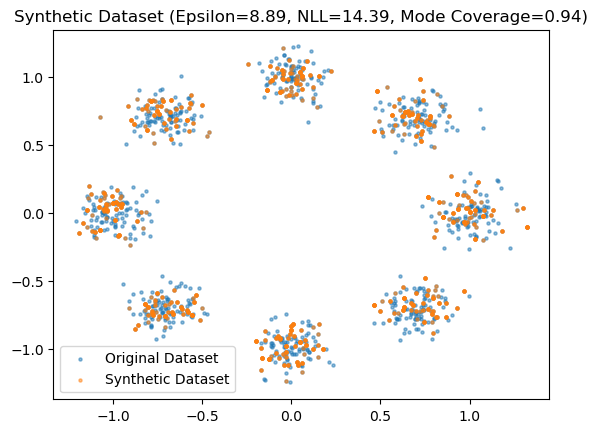

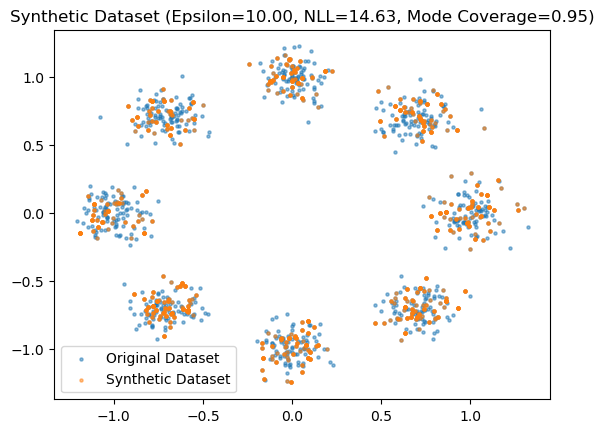

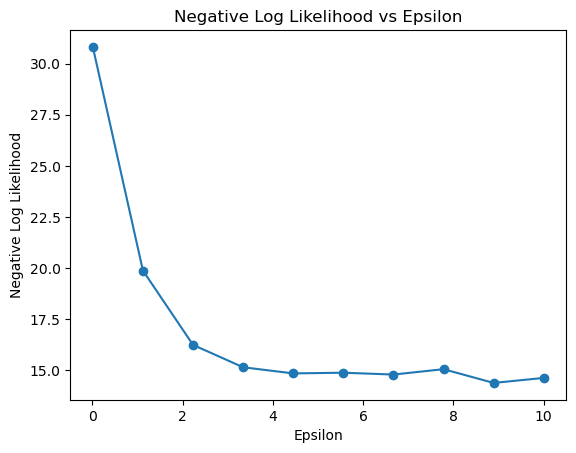

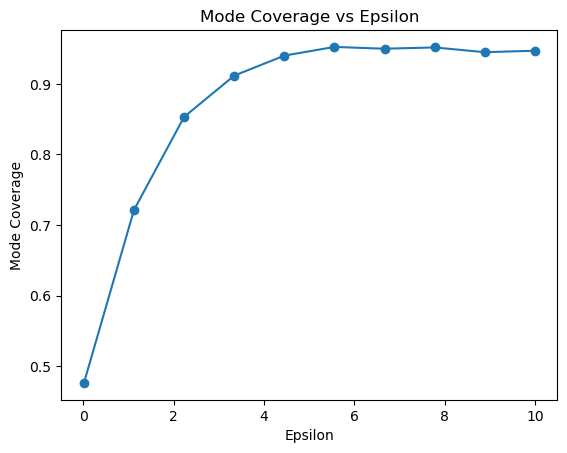

In [7]:
def generate_synthetic_dataset(original_dataset, final_distribution):
    # Ensure the final distribution sums up to 1
    final_distribution_normalized = final_distribution / \
        np.sum(final_distribution)

    # Calculate the cumulative sum of the normalized final distribution
    cumulative_distribution = np.cumsum(final_distribution_normalized)

    # Generate random numbers to select indices
    random_numbers = np.random.rand(len(original_dataset))

    # Select indices based on the cumulative distribution
    synthetic_indices = np.searchsorted(
        cumulative_distribution, random_numbers)

    # Retrieve the synthetic dataset from the original dataset based on the sampled indices
    synthetic_dataset = original_dataset[synthetic_indices]

    return synthetic_dataset


def generate_ring_gaussians(num_points, num_clusters, weights):
    points_per_cluster = num_points // num_clusters
    points = []

    for i in range(num_clusters):
        theta = 2 * np.pi * i / num_clusters  # Angle for each cluster center
        center_x = np.cos(theta)  # x-coordinate of cluster center
        center_y = np.sin(theta)  # y-coordinate of cluster center

        # Generate points for each cluster with Gaussian noise
        cluster_points = np.random.normal(
            loc=[center_x, center_y], scale=0.1, size=(points_per_cluster, 2))
        points.extend(cluster_points)

    return np.vstack(points)


if __name__ == "__main__":
    # Parameters for the normal distributions
    num_points = 1000
    num_clusters = 8
    # Equal weights for each cluster
    original_weights = np.ones(num_clusters) / num_clusters

    # Generate ring Gaussians data
    original_dataset = generate_ring_gaussians(
        num_points, num_clusters, original_weights)

    # Define parameters
    T = 10
    epsilons = np.linspace(0.01, 10.0, 10)  # Vary epsilon values
    mode_coverages = []
    negative_log_likelihoods = []

    for epsilon in epsilons:
        P = np.random.rand(len(original_dataset))
        Q0 = np.random.normal(loc=0, scale=1, size=len(original_dataset))
        final_distribution = boosting_algorithm(
            weak_learner, T, epsilon, Q0, P)

        # Generate synthetic dataset
        synthetic_dataset = generate_synthetic_dataset(
            original_dataset, final_distribution)

        # Mode coverage and Negative Log Likelihood
        mode_coverage_value = mode_coverage(P, final_distribution)
        negative_log_likelihood_value = negative_log_likelihood(
            P, final_distribution)

        mode_coverages.append(mode_coverage_value)
        negative_log_likelihoods.append(negative_log_likelihood_value)

        # Plot original and synthetic distributions
        plt.scatter(original_dataset[:, 0], original_dataset[:,
                    1], s=5, alpha=0.5, label='Original Dataset')
        plt.scatter(synthetic_dataset[:, 0], synthetic_dataset[:,
                    1], s=5, alpha=0.5, label='Synthetic Dataset')
        plt.legend()
        plt.title(
            f'Synthetic Dataset (Epsilon={epsilon:.2f}, NLL={negative_log_likelihood_value:.2f}, Mode Coverage={mode_coverage_value:.2f})')
        plt.show()

    # Plot NLL vs Epsilon
    plt.plot(epsilons, negative_log_likelihoods, marker='o')
    plt.xlabel('Epsilon')
    plt.ylabel('Negative Log Likelihood')
    plt.title('Negative Log Likelihood vs Epsilon')
    plt.show()

    # Plot Mode Coverage vs Epsilon
    plt.plot(epsilons, mode_coverages, marker='o')
    plt.xlabel('Epsilon')
    plt.ylabel('Mode Coverage')
    plt.title('Mode Coverage vs Epsilon')
    plt.show()

### ORIGINAL EXPERIMENT DATA AND E-LDP GENERATED DATA

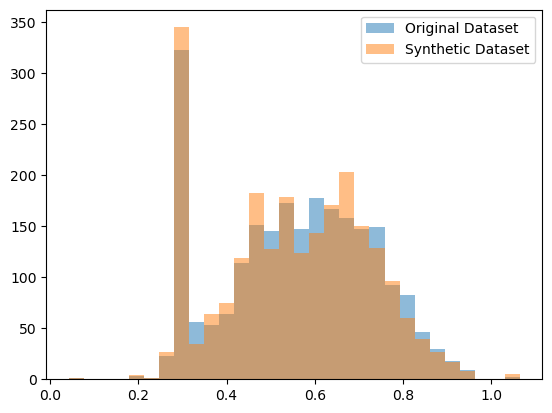

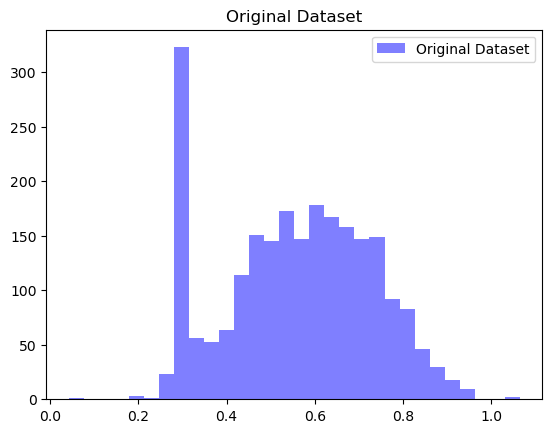

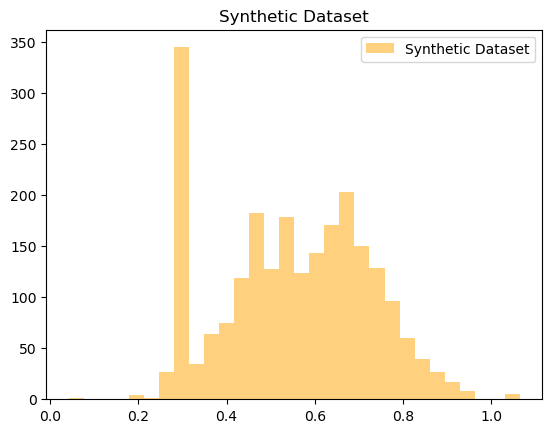

In [8]:
if __name__ == "__main__":
    # Example usage
    # Load or create your dataset
    means = [0.3, 0.5, 0.7]
    std_devs = [0.01, 0.1, 0.1]
    weights = [1/3,1,1]  # weights for the mixture

    # Number of samples you want to generate
    num_samples = 1000

    # Generate random samples
    samples = np.concatenate([
        np.random.normal(mean, std_dev, int(weight * num_samples))
        for mean, std_dev, weight in zip(means, std_devs, weights)
    ])

    # Shuffle the samples
    np.random.shuffle(samples)
    original_dataset = samples
    P = np.random.rand(len(original_dataset))

    # Define parameters
    T = 10
    epsilon = 0.1
    Q0 = np.random.normal(loc=0, scale=1, size=len(
        original_dataset))  # Updated Q0

    # Run boosting algorithm
    final_distribution = boosting_algorithm(weak_learner, T, epsilon, Q0, P)

    # Generate synthetic dataset
    synthetic_dataset = generate_synthetic_dataset(
        original_dataset, final_distribution)

    # Plot original and synthetic distributions
    plt.hist(original_dataset, bins=30, alpha=0.5, label='Original Dataset')
    plt.hist(synthetic_dataset, bins=30, alpha=0.5, label='Synthetic Dataset')
    plt.legend()
    plt.show()

    # Plot original dataset
    plt.hist(original_dataset, bins=30, alpha=0.5,
             color='blue', label='Original Dataset')
    plt.legend()
    plt.title('Original Dataset')
    plt.show()

    # Plot synthetic dataset
    plt.hist(synthetic_dataset, bins=30, alpha=0.5,
             color='orange', label='Synthetic Dataset')
    plt.legend()
    plt.title('Synthetic Dataset')
    plt.show()

### TESTING FOR VARIOUS TYPES OF DATASETS

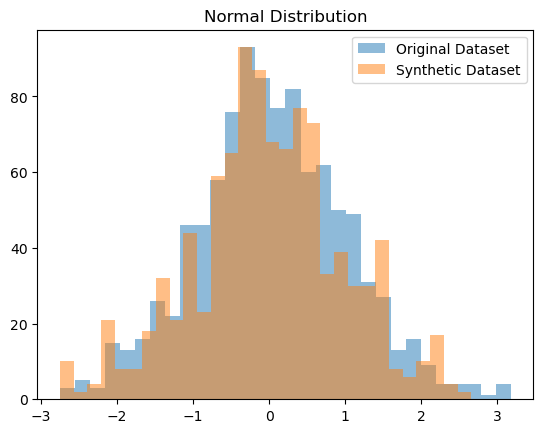

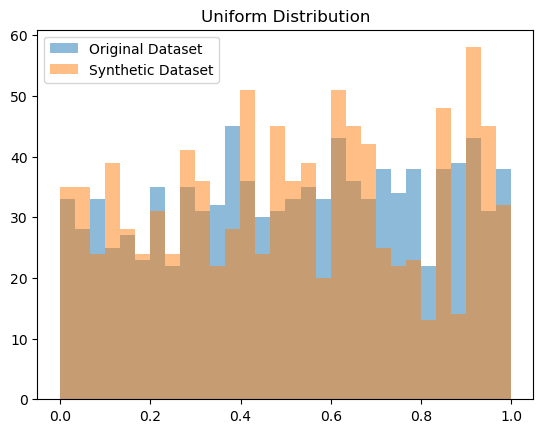

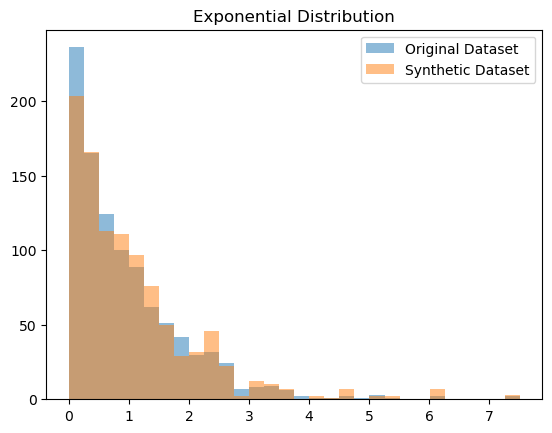

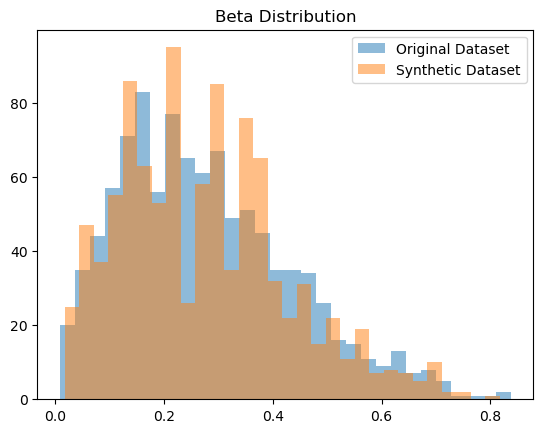

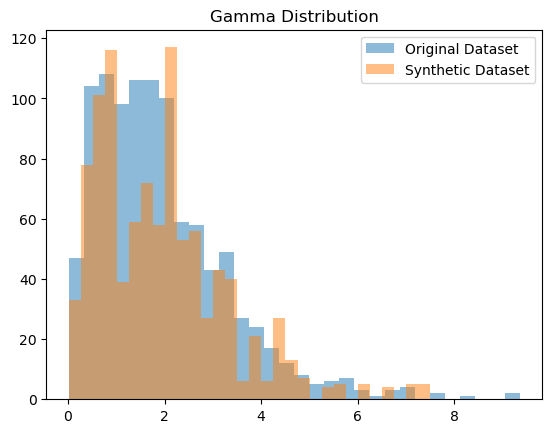

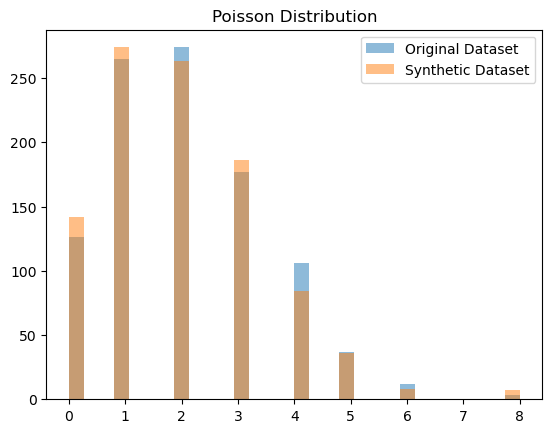

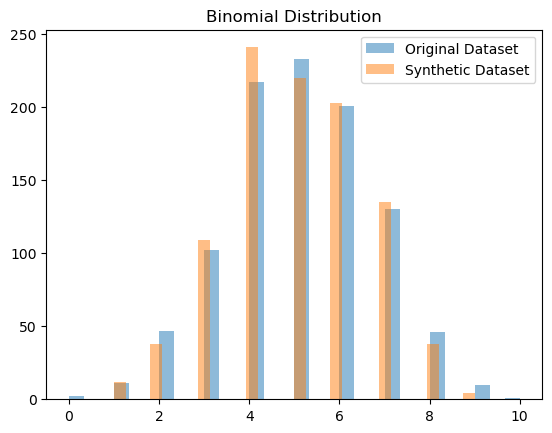

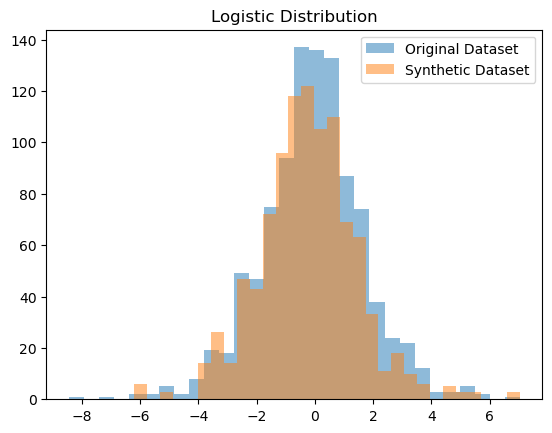

In [9]:
if __name__ == "__main__":
    # Example usage
    # Define parameters
    T = 10
    epsilon = 0.1

    # Original datasets
    datasets = {
        'Normal Distribution': np.random.normal(loc=0, scale=1, size=1000),
        'Uniform Distribution': np.random.uniform(low=0, high=1, size=1000),
        'Exponential Distribution': np.random.exponential(scale=1, size=1000),
        'Beta Distribution': np.random.beta(2, 5, size=1000),
        'Gamma Distribution': np.random.gamma(shape=2, scale=1, size=1000),
        'Poisson Distribution': np.random.poisson(lam=2, size=1000),
        'Binomial Distribution': np.random.binomial(n=10, p=0.5, size=1000),
        'Logistic Distribution': np.random.logistic(loc=0, scale=1, size=1000)
    }

    for name, original_dataset in datasets.items():
        P = np.random.rand(len(original_dataset))
        Q0 = np.random.normal(loc=0, scale=1, size=len(
            original_dataset))  

        # Run boosting algorithm
        final_distribution = boosting_algorithm(
            weak_learner, T, epsilon, Q0, P)

        # Generate synthetic dataset
        synthetic_dataset = generate_synthetic_dataset(
            original_dataset, final_distribution)

        # Plot original and synthetic distributions
        plt.hist(original_dataset, bins=30,
                 alpha=0.5, label='Original Dataset')
        plt.hist(synthetic_dataset, bins=30,
                 alpha=0.5, label='Synthetic Dataset')
        plt.legend()
        plt.title(name)
        plt.show()

<--------------------------------------------------------------COMPLETE------------------------------------------------------------------------>